In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
# PorterStemmer => stemming
# WordNetLemmatizer =>lemmataization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM


In [2]:
train_data = open('./Data/train.txt').readlines()
val_data = open('./Data/val.txt').readlines()
test_data = open('./Data/test.txt').readlines()

In [3]:
full_data = train_data + val_data + test_data
len(full_data)

20000

In [4]:
full_data[1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n'

In [5]:
len(full_data[1])

117

In [6]:
x = []
y = []
for line in full_data:
    text,label = line.strip().split(';')
    x.append(text)
    y.append(label)

In [7]:
len(x) , len(y)

(20000, 20000)

In [8]:
labels = list(set(y))
labels

['anger', 'sadness', 'joy', 'surprise', 'fear', 'love']

In [9]:
df = pd.DataFrame({'message':x,'label':y})
df.head()

,message,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
name = list(df['label'].value_counts().keys())
value = list(df['label'].value_counts().values)

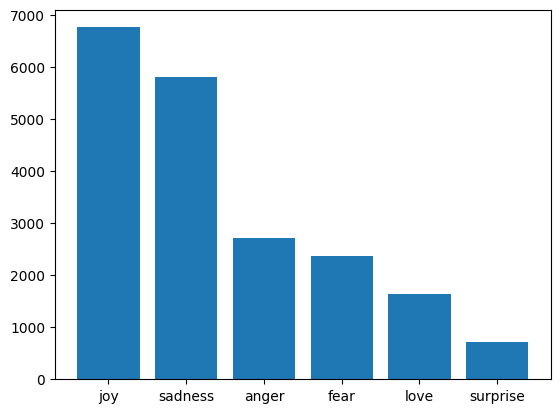

In [11]:
plt.bar(name,value)
plt.show()

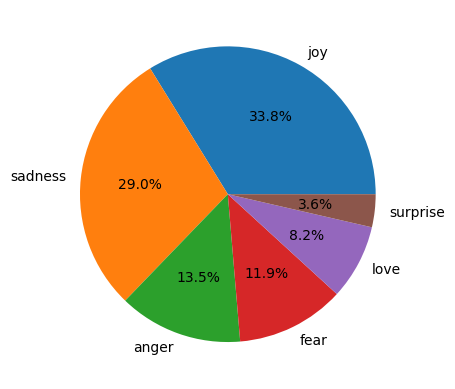

In [12]:
plt.pie(value,labels=name,data=df,autopct='%2.1f%%')
plt.show()

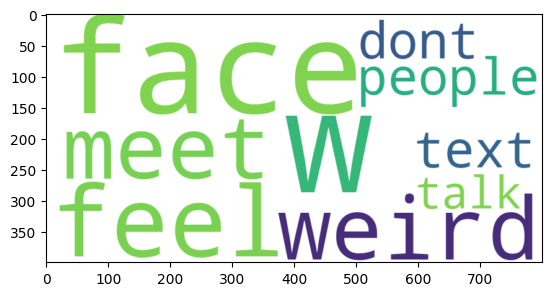

In [13]:
# word cloud...
word = WordCloud(width=800, height=400, background_color='white', contour_color='black').generate(text)
plt.imshow(word, interpolation='bilinear')

In [14]:
# text cleaning function
def text_cleaning(messages,stemming):
    clean_data = []
    for message in messages:
        message = message.lower()
        ls_of_words = nltk.word_tokenize(message)
        word_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')]
        ls_of_stemmed_words = [stemming.stem(word) for word in word_without_stop_words]
        clean_message = " ".join(ls_of_stemmed_words)
        clean_data.append(clean_message)

    return clean_data

stemming = PorterStemmer()
clean_data = text_cleaning(messages=x,stemming=stemming)


In [15]:
import os,joblib
os.makedirs('clean_data',exist_ok=True)

joblib.dump(clean_data,"./clean_data/clean_text.lb")

['./clean_data/clean_text.lb']

In [16]:
# single message cleaning
message = x[1]
message = message.lower()
# message.split()
ls_of_words = nltk.word_tokenize(message)  # message.split()
word_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')]
stemming = PorterStemmer()
print(word_without_stop_words)
stemmed_words = [ ]
for word in word_without_stop_words:
    stemmed_words.append(stemming.stem(word))
print(stemmed_words)
" ".join(stemmed_words)

['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake']
['go', 'feel', 'hopeless', 'damn', 'hope', 'around', 'someon', 'care', 'awak']


'go feel hopeless damn hope around someon care awak'

In [17]:
stopwords_ls = stopwords.words('english')
stopwords_ls

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# text to numerical representation
tokenizer = Tokenizer(oov_token='<nothin>')
tokenizer.fit_on_texts(clean_data)

In [19]:
len(clean_data)

20000

In [20]:
clean_data[0]

'didnt feel humili'

In [33]:
sequences = tokenizer.texts_to_sequences(clean_data)

In [45]:
# tokenizer.word_index
sequences[0:5]

array([[  61,    2,  522,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  10,    2,  419,  682,   67,   50,   60,   96, 1229,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4, 1230,  431,  107,    2,  432,  192,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  92,    2,  592, 3696,    7,   21, 2844,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   2,  918,    0,   

In [46]:
len(sequences)

20000

In [36]:
sequences

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918],
 [22, 2, 13, 343, 170, 260, 72],
 [22, 47, 6002, 6, 1347, 712, 22, 2375, 1348, 66, 1610, 44, 2, 3, 355],
 [2, 339, 23, 1174, 713, 46, 196, 298],
 [4452, 46, 2, 4452, 897, 56, 53, 887, 2845],
 [2, 550],
 [2, 3, 9, 373, 35, 139, 27],
 [2, 134, 508, 240, 337, 449, 1199, 1685],
 [14, 4453, 6, 46, 2, 523],
 [2, 299, 371, 3697],
 [1762,
  1499,
  106,
  154,
  308,
  6003,
  958,
  36,
  64,
  6,
  65,
  1349,
  23,
  1142,
  2846,
  93,
  137,
  1350,
  1500,
  2,
  13,
  472],
 [2, 638, 919, 377],
 [61, 8, 2, 325],
 [2, 39, 496, 6],
 [31, 2, 786, 2082, 311, 514, 1269, 2083, 3698, 2082, 4454],
 [2, 2376, 759, 320, 71, 2377, 30, 111],
 [2, 160, 380, 90, 182, 80, 33, 80],
 [2,
  130,
  147,
  148,
  2217,
  43,
  2,
  787,
  1868,
  123,
  1351,
  1118,
  1017,
  143,
  103,
  524,
  959,
  17,
  639],
 [2, 760, 714],
 [113, 43, 4455, 4456, 89, 1143, 214, 2,

In [47]:
# x data ready
sequences = pad_sequences(sequences,padding='post' , maxlen=max(list(map(len,sequences))))
sequences[0:3]

array([[  61,    2,  522,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  10,    2,  419,  682,   67,   50,   60,   96, 1229,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4, 1230,  431,  107,    2,  432,  192,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])

In [38]:
len(sequences[4])

35

In [40]:
label_dict = {label:i for i, label in enumerate(labels)}
label_dict

{'anger': 0, 'sadness': 1, 'joy': 2, 'surprise': 3, 'fear': 4, 'love': 5}

In [56]:
y_labeled = []
for label in y:
    print(label_dict[label])

labels = np.array(y_labeled)

1
1
0
5
0
1
3
4
2
5
1
2
0
1
2
2
1
1
1
4
0
4
2
2
0
1
1
1
0
2
2
4
3
0
2
2
2
2
0
2
2
2
2
2
1
1
2
5
2
0
2
1
0
4
2
1
1
3
2
2
2
5
4
4
3
0
0
1
5
2
1
1
2
1
1
1
2
2
2
0
1
0
0
0
2
2
2
2
1
4
5
0
1
0
5
1
2
2
1
0
5
2
2
2
1
2
2
2
2
1
2
2
5
1
1
2
2
1
2
2
4
4
4
1
5
2
2
5
4
3
2
2
2
2
0
4
2
0
5
0
1
2
1
0
2
3
1
0
0
1
2
4
2
2
4
1
3
3
2
0
4
0
1
0
1
4
1
2
3
4
2
0
2
0
2
4
4
1
2
2
1
3
2
4
2
1
2
2
2
4
2
3
2
0
1
1
2
0
1
2
2
3
2
4
2
4
1
4
5
1
4
5
1
1
0
2
5
0
1
3
0
2
1
0
2
2
2
2
2
1
2
5
2
1
0
3
2
0
2
5
1
1
2
1
1
2
1
2
2
2
4
1
0
1
0
5
2
5
1
2
2
2
1
2
1
0
5
1
5
1
1
1
1
1
1
4
2
1
1
2
5
1
0
1
5
2
2
2
1
2
1
2
2
2
1
1
1
5
4
1
4
2
2
4
2
0
0
5
1
3
2
0
1
1
0
5
3
1
5
2
0
2
1
1
2
2
4
1
0
2
5
2
2
2
2
2
5
2
4
4
2
2
0
2
2
2
1
3
2
2
1
3
2
4
2
0
5
0
4
3
2
0
1
1
1
4
2
4
2
0
1
5
0
1
5
5
2
1
2
2
0
2
5
2
2
1
3
2
2
1
3
0
2
2
5
2
5
5
2
1
2
1
4
0
1
0
2
4
3
5
1
1
2
3
5
1
1
2
4
2
2
2
5
4
1
1
4
5
2
1
2
1
2
1
2
1
2
2
0
1
4
1
1
0
3
3
2
3
4
5
0
2
4
1
0
1
2
4
2
2
2
2
3
0
1
2
1
0
5
1
5
0
5
5
2
2
1
2
1
2
0
2
4
1
2
1
3
2
2
5
2
1
0
2
1
1
1
2
2
2


In [58]:
sequences.shape , label.shape

AttributeError: 'str' object has no attribute 'shape'

In [60]:
x_train,x_test,y_train,y_test = train_test_split(sequences,labels,test_size=0.16)

ValueError: Found input variables with inconsistent numbers of samples: [20000, 0]

In [ ]:
model = Sequential([LSTM(64,input_shape=(35,1),return_sequences=True),  # hidden layer 1
                   LSTM(units=32),  # hidden layer 2
                   Dense(units=6,activation='softmax')])    # output layer

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()
# binary classification => binary_crossentropy
# multi class classification => categorical_crossentropy , sparse_categorical_crossentropy

# y
# labeLencode => sparse_categorical_crossentropy
# onehotencode => categorical_crossentropy

In [ ]:
# train the algorithm
model.fit(x_train,y_train,epochs=8,validation_data=(x_test,y_test))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred.shape

In [ ]:
x_test.shape

NameError: name 'x_test' is not defined

In [ ]:
predictions = np.argmax(pred,axis=1)

NameError: name 'pred' is not defined

In [ ]:
y_test

In [ ]:
evaluation_df = pd.DataFrame({'actual':y_test,'prediction':predictions})
evaluation_df.head()

In [ ]:
label = {0:'joy',1:'surprise',2:'fear',3:'anger',4:'sadness',5:'love'}

In [ ]:
evaluation_df[''] = evaluation_df['actual'].map(label)


In [ ]:
# saving...
os.makedirs('prediction',exist_ok=True)
evaluation_df.to_csv('./prediction/prediction.csv',index=False)

os.makedirs('models',exist_ok=True)
model.save('./models/lstm_model.h5')